In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import datasets
import numpy as np

In [2]:
full_data_row = pd.read_excel(r"C:\Users\66910\Downloads\BelgorodWeather\full_data_gotnya_2023.xlsx")
full_data_row

,start,end,long,minday,minfday,meanperiod,gsop,year,mean_year
0,1936-10-03,1937-04-20,199,-21.0,-18.76,-1.93,3966.0,1937,6.866911
1,1937-10-05,1938-04-20,197,-17.1,-14.82,-1.01,3745.0,1938,7.656839
2,1938-10-27,1939-04-09,164,-19.2,-18.36,-2.97,3439.0,1939,6.809974
3,1939-09-27,1940-04-19,205,-32.4,-27.02,-3.99,4508.0,1940,5.069836
4,1945-10-02,1946-04-22,202,-19.5,-17.88,-2.44,4129.0,1946,6.423954
...,...,...,...,...,...,...,...,...,...
75,2018-09-30,2019-04-09,191,-16.9,-10.92,-0.12,3461.0,2019,8.942503
76,2019-09-24,2020-03-08,166,-10.5,-8.10,2.73,2535.0,2020,9.169090
77,2020-10-21,2021-04-13,174,-20.9,-17.46,-1.13,3329.0,2021,7.799281
78,2021-10-01,2022-04-02,183,-15.9,-11.96,0.00,3294.0,2022,7.950000


In [3]:
#Установили колонку year в качестве индекса
full_data_row.set_index('year',inplace=True)
full_data_row

,start,end,long,minday,minfday,meanperiod,gsop,mean_year
year,,,,,,,,
1937,1936-10-03,1937-04-20,199,-21.0,-18.76,-1.93,3966.0,6.866911
1938,1937-10-05,1938-04-20,197,-17.1,-14.82,-1.01,3745.0,7.656839
1939,1938-10-27,1939-04-09,164,-19.2,-18.36,-2.97,3439.0,6.809974
1940,1939-09-27,1940-04-19,205,-32.4,-27.02,-3.99,4508.0,5.069836
1946,1945-10-02,1946-04-22,202,-19.5,-17.88,-2.44,4129.0,6.423954
...,...,...,...,...,...,...,...,...
2019,2018-09-30,2019-04-09,191,-16.9,-10.92,-0.12,3461.0,8.942503
2020,2019-09-24,2020-03-08,166,-10.5,-8.10,2.73,2535.0,9.169090
2021,2020-10-21,2021-04-13,174,-20.9,-17.46,-1.13,3329.0,7.799281


In [4]:
# выбрали объекты после 1988 года
gsop = full_data_row[['gsop']].loc[1988:]
# Сделали колонку с годом
gsop['year'] = gsop.index
# дропнули индекс
gsop.reset_index(drop=True, inplace=True)
gsop

,gsop,year
0,4006.0,1988
1,3434.0,1989
2,2985.0,1990
3,3600.0,1991
4,3268.0,1992
5,4005.0,1993
6,4086.0,1994
7,3619.0,1995
8,4473.0,1996
9,4060.0,1997


In [5]:
# делим выборку на признак и таргет
X = gsop[['year']]
y = gsop[['gsop']]

# Определение размера тестового набора
test_size = 0.2

# Вычисление количества элементов в тестовом наборе
test_count = int(len(X) * test_size)
X_train = X[:-test_count]
y_train = y[:-test_count]
X_test = X[-test_count:]
y_test = y[-test_count:]

# Создаем экземпляр линейной регрессии
regr = LinearRegression()

# Обучаем регрессию на данных
regr.fit(X_train, y_train)

# записываем x тест в переменную
y_pred = regr.predict(X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

Coefficients: 
 [[-11.4635468]]
Mean squared error: 139626.74
Coefficient of determination: -0.06


In [6]:
std_dev_gsop = np.std(y_test - y_pred)
round(std_dev_gsop,0)

gsop    351.0
dtype: float64

In [7]:
feature_value_2050_gsop = np.array([[2050]])
# Предсказываем значение целевой переменной для данного значения признака
predicted_value_2050_gsop = regr.predict(feature_value_2050_gsop)
print("Предсказанное значение для признака, равного 2050:", predicted_value_2050_gsop)

Предсказанное значение для признака, равного 2050: [[3042.47389163]]


C:\Users\66910\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [8]:
feature_value = np.array([i for i in range(2023,2051)]).reshape(-1, 1)

# Предсказываем значение целевой переменной для данного значения признака
predicted_value = regr.predict(feature_value)

print("Предсказанное значение для признака, равного 2050:", predicted_value)

Предсказанное значение для признака, равного 2050: [[3351.98965517]
 [3340.52610837]
 [3329.06256158]
 [3317.59901478]
 [3306.13546798]
 [3294.67192118]
 [3283.20837438]
 [3271.74482759]
 [3260.28128079]
 [3248.81773399]
 [3237.35418719]
 [3225.89064039]
 [3214.4270936 ]
 [3202.9635468 ]
 [3191.5       ]
 [3180.0364532 ]
 [3168.5729064 ]
 [3157.10935961]
 [3145.64581281]
 [3134.18226601]
 [3122.71871921]
 [3111.25517241]
 [3099.79162562]
 [3088.32807882]
 [3076.86453202]
 [3065.40098522]
 [3053.93743842]
 [3042.47389163]]


C:\Users\66910\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [9]:
# записываем x тест в переменную
y_pred_2023_gsop= regr.predict(X)

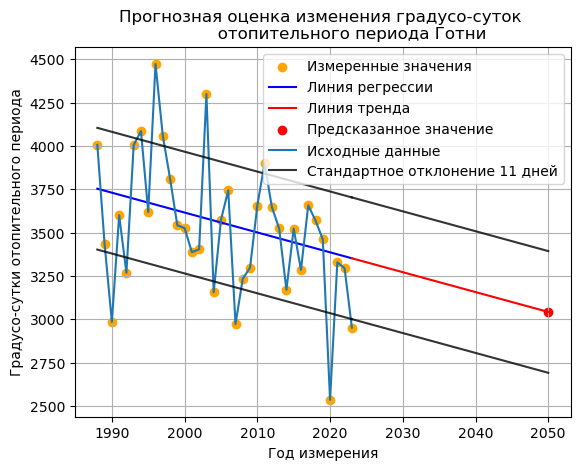

In [11]:
plt.scatter(X, y, color='orange', label='Измеренные значения')
plt.plot(X, regr.predict(X), color='blue', label='Линия регрессии')
plt.plot(feature_value, predicted_value, color='red', label='Линия тренда')
plt.scatter(2050, 3042 , color='red', label='Предсказанное значение')
plt.plot(X, y, label='Исходные данные')
plt.plot(X, y_pred_2023_gsop - 351, color='black', alpha=0.8)
plt.plot(X, y_pred_2023_gsop + 351, color='black', alpha=0.8)
plt.plot(feature_value, predicted_value - 351, color='black', alpha=0.8)
plt.plot(feature_value, predicted_value + 351, color='black', alpha=0.8,
         label='Стандартное отклонение 11 дней')
plt.ylabel('Градусо-сутки отопительного периода')
plt.title('Прогнозная оценка изменения градусо-суток \n \
          отопительного периода Готни')
plt.xlabel('Год измерения')
plt.legend()
plt.grid(True)
plt.show()